# Tutorial: GebPy
## Rock generation with the SedimentaryBasin class

In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath("Tutorial_Sedimentary-Basin-Rock-Generation.py"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [2]:
# MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  matplotlib as mpl
from matplotlib.ticker import NullFormatter
from modules import sequences
from modules import geophysics
from pandas.plotting import scatter_matrix
import seaborn as sn

In [3]:
# Sandstone generation within SedimentaryBasin class
data = sequences.SedimentaryBasin(parts=500)
data_sandstone = data.create_sandstone(thickness=50)

### Data Processing

The following functions allow to extract specific information, e.g. the rock names or geophysical data, of the previously generated datasets. 

In [4]:
data = sequences.DataProcessing(dataset=data_sandstone)
rock_name = data.extract_lithology(type="rock")
thickness = data.extract_thickness(type="rock")
top = data.extract_top(type="rock")
bottom = data.extract_bottom(type="rock")
elements = data.extract_elements(type="rock")
mineralogy = data.extract_mineralogy(type="rock")
density_bulk = data.extract_densities(type="rock", keyword="bulk")
elastic_bulk = data.extract_elastic_moduli(type="rock", keyword="bulk")
elastic_mu = data.extract_elastic_moduli(type="rock", keyword="poisson")
vP = data.extract_seismic_velocities(type="rock", keyword="vP")
vS = data.extract_seismic_velocities(type="rock", keyword="vS")
phi = data.extract_porosity(type="rock")
fluid = data.extract_fluid(type="rock")
gr = data.extract_gamma_ray(type="rock")
pe = data.extract_photoelectricity(type="rock")
amounts_minerals = data.extract_mineral_amounts(type="rock")
amounts_elements = data.extract_element_amounts(type="rock")

print("Lithology:\n", rock_name)
print("Thickness:\n", thickness)
print("Top:\n", top)
print("Bottom:\n", bottom)
print("Chemical elements:\n", elements)
print("Mineralogy:\n", mineralogy)
print("Density (Bulk):\n", density_bulk)
print("Elastic moduli (Bulk):\n", elastic_bulk)
print("Elastic moduli (Poisson):\n", elastic_mu)
print("P-wave velocity:\n", vP)
print("S-wave velocity:\n", vS)
print("Porosity:\n", phi)
print("Fluid:\n", fluid)
print("Gamma ray (natural):\n", gr)
print("Photoelectricity:\n", pe)
print("Mineral amounts:\n", amounts_minerals)
print("Element amounts:\n", amounts_elements)

Lithology:
 ['sandstone']
Thickness:
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 

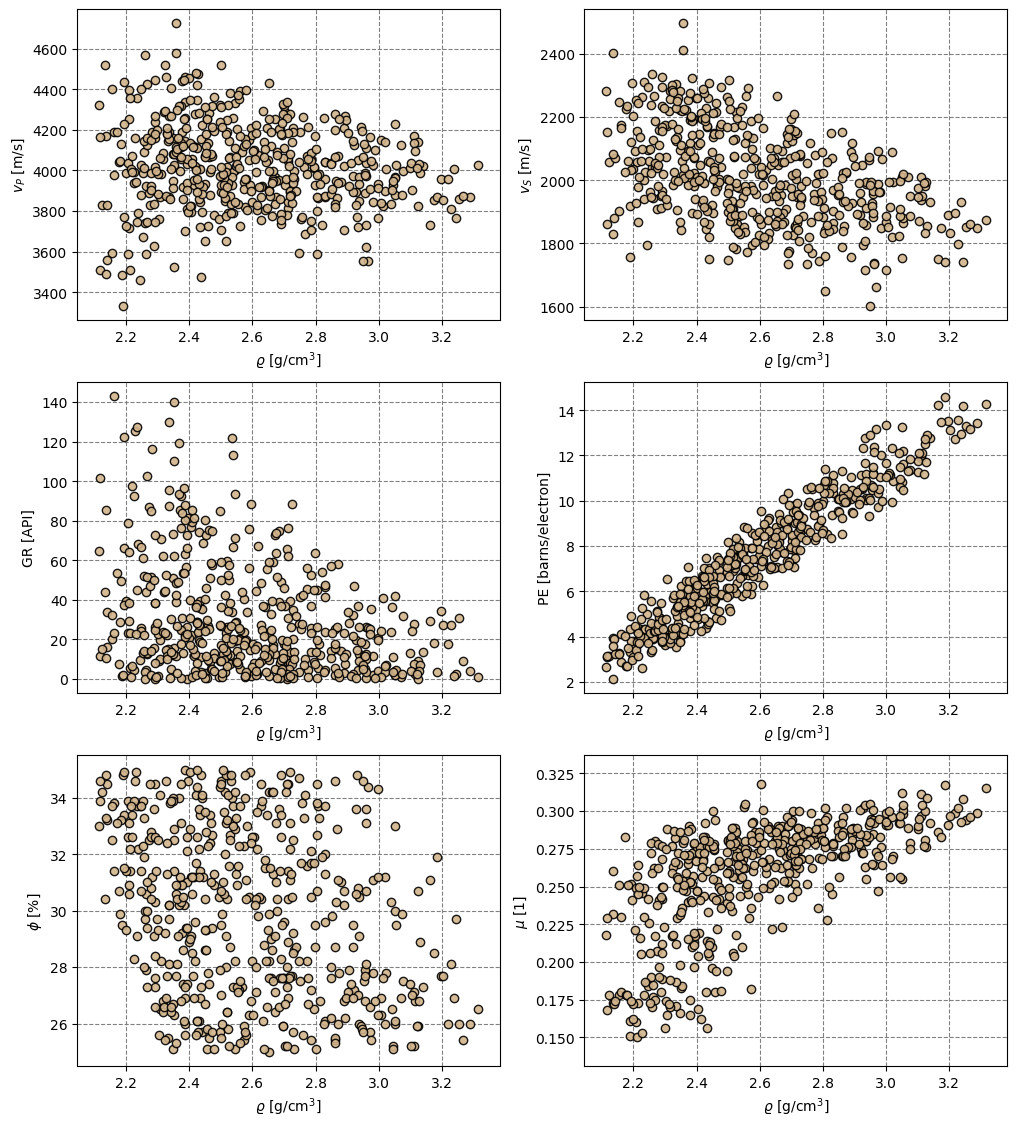

In [5]:
fig, axs = plt.subplots(3, 2, dpi=100, figsize=(12,14))

color_sandstone = "tan"
for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

axs[0,0].scatter(density_bulk, vP, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
axs[0,1].scatter(density_bulk, vS, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
axs[1,0].scatter(density_bulk, gr, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
axs[1,1].scatter(density_bulk, pe, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("PE [barns/electron]")
axs[2,0].scatter(density_bulk, phi*100, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,0].set_ylabel("$\phi$ [%]")
axs[2,1].scatter(density_bulk, elastic_mu, color=color_sandstone, edgecolors="black", alpha=0.9)
axs[2,1].set_ylabel("$\mu$ [1]")

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_01.png", bbox_inches="tight")
plt.show()

In [6]:
df = pd.DataFrame(list(zip(density_bulk, gr, phi*100, pe, vP, vS, elastic_mu)), columns=["RHOB", "GR", "PHIN", "PE", "VP", "VS", "POISSON"]) 

In [7]:
df

,RHOB,GR,PHIN,PE,VP,VS,POISSON
0,2.188,1.538,29.5,3.322,3482.95,1917.22,0.151
1,2.189,2.127,34.8,4.312,3332.68,1756.39,0.161
2,2.262,4.535,27.9,3.871,3587.80,1943.78,0.177
3,2.213,5.297,31.4,4.359,3507.50,1869.54,0.173
4,2.303,8.933,25.6,3.962,3758.99,2073.92,0.174
...,...,...,...,...,...,...,...
495,2.928,0.605,30.6,10.584,3829.93,1865.69,0.272
496,2.647,10.943,33.4,8.384,3814.29,1862.49,0.263
497,2.644,3.252,28.2,7.038,4042.25,2056.79,0.253
498,2.610,3.910,27.1,6.290,4183.14,2166.93,0.249


In [8]:
df.describe()

,RHOB,GR,PHIN,PE,VP,VS,POISSON
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.590846,29.208956,29.928400,7.493154,4021.836900,2012.154400,0.257844
std,0.271988,27.932662,2.991999,2.714804,208.067889,148.739739,0.037246
min,2.113000,0.000000,25.000000,2.138000,3332.680000,1602.550000,0.150000
25%,2.377500,8.712000,27.300000,5.302250,3880.882500,1897.440000,0.243750
50%,2.550500,20.575000,30.000000,7.326500,4016.640000,1999.165000,0.270000
75%,2.778750,41.404500,32.600000,9.505750,4162.190000,2118.732500,0.284000
max,3.316000,142.875000,35.000000,14.602000,4724.350000,2497.050000,0.318000


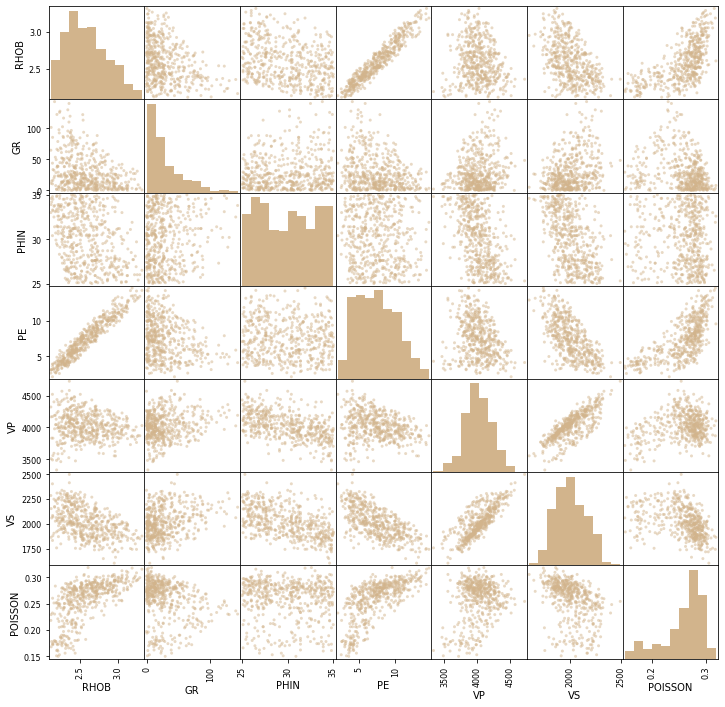

In [9]:
scatter_matrix(df[["RHOB", "GR", "PHIN", "PE", "VP", "VS", "POISSON"]], color=color_sandstone, hist_kwds={'color':[color_sandstone]}, figsize=(12, 12), diagonal="hist");

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_02.png", bbox_inches="tight")
plt.show()

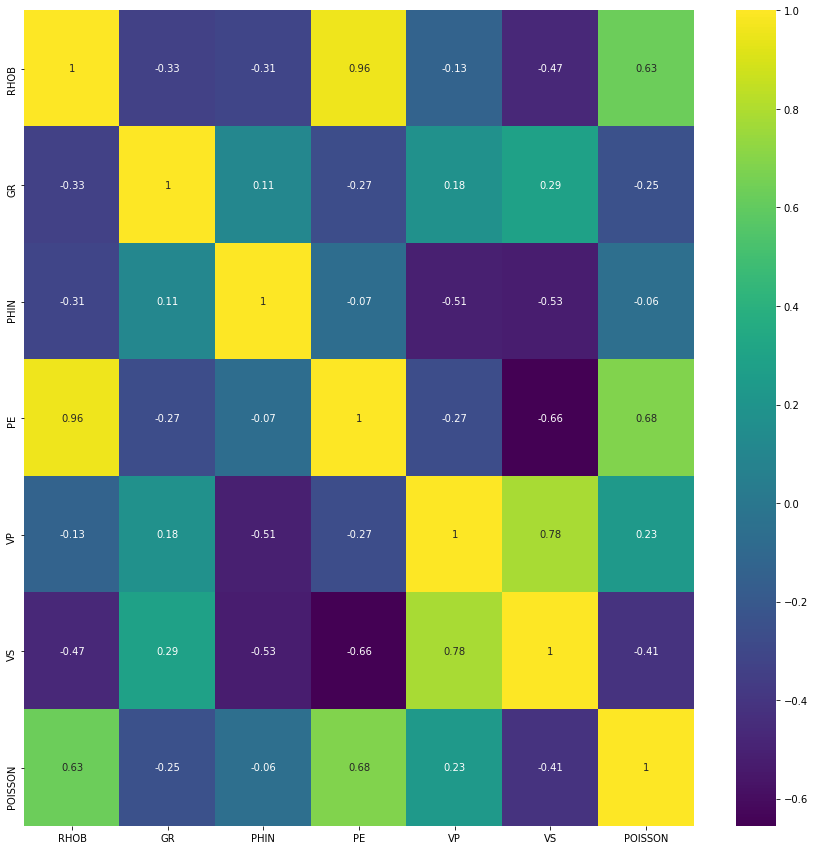

In [10]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr(), cmap="viridis", annot=True);

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_03.png", bbox_inches="tight")
plt.show()

In [11]:
data = geophysics.Seismology()
impedance = data.calculate_impedance(velocity=vP, density=density_bulk)
reflection_coeff = data.calculate_reflection_coefficient(impedance=impedance)
transmission_coeff = data.calculate_transmission_coefficient(impedance=impedance)
t0 = data.calculate_t0(thickness=thickness, velocity=vP)

In [12]:
w_qz = amounts_minerals[:,0]
w_kfs = amounts_minerals[:,1]
w_pl = amounts_minerals[:,2]
w_cal = amounts_minerals[:,3]
w_chl = amounts_minerals[:,4]
w_ms = amounts_minerals[:,5]
w_hem = amounts_minerals[:,6]

w_h = amounts_elements[:,0]
w_c = amounts_elements[:,1]
w_o = amounts_elements[:,2]
w_f = amounts_elements[:,3]
w_na = amounts_elements[:,4]
w_mg = amounts_elements[:,5]
w_al = amounts_elements[:,6]
w_si = amounts_elements[:,7]
w_k = amounts_elements[:,8]
w_ca = amounts_elements[:,9]
w_fe = amounts_elements[:,10]

/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2710: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


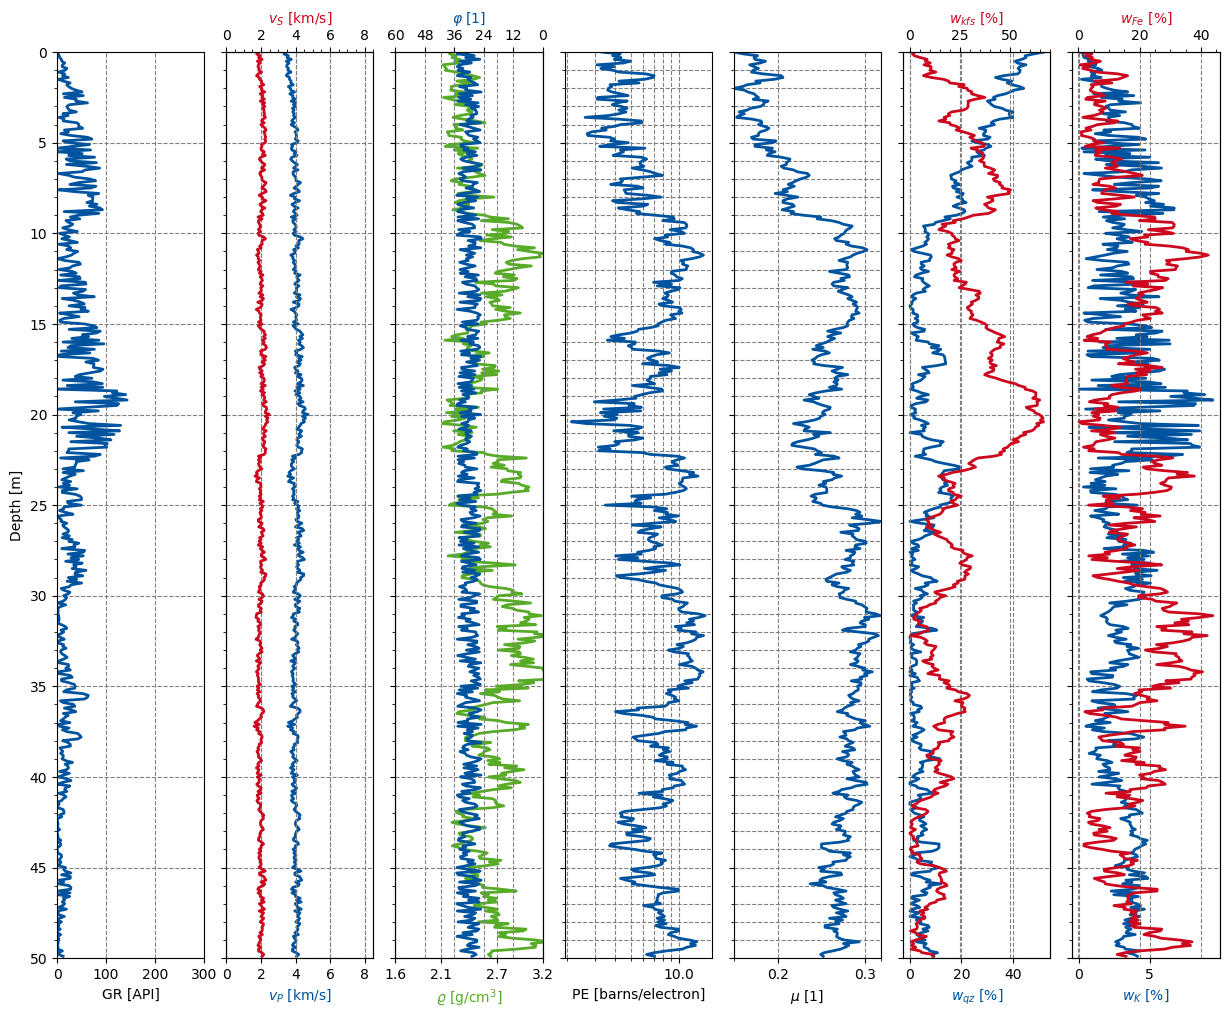

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey='row', gridspec_kw={'wspace': 0.15}, figsize=(15, 12), dpi=100)
fig.subplots_adjust(wspace=0.25)
# 1
ax1.plot(gr, top, color="#00549F", linewidth=2)
ax1.set_xlabel("GR [API]")
ax1.set_ylabel("Depth [m]")
ax1.set_xlim(0, 300)
ax1.set_xticks(np.arange(0, 400, 100))
ax1.set_ylim(0, max(bottom))
ax1.set_yticks(np.arange(0, max(bottom)+5, 5))
ax1.grid(color="grey", linestyle="dashed")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 2
vP_edit = [vP[i]/1000 for i in range(len(vP))]
vS_edit = [vS[i]/1000 for i in range(len(vS))]
ax2.plot(vP_edit, top, color="#00549F", linewidth=2)
ax2.set_xlabel("$v_P$ [km/s]")
ax2.set_xlim(0, 8.5)
ax2.set_xticks(np.arange(0, 8.5, 2.0))
ax2.xaxis.label.set_color("#00549F")
ax2.set_ylim(0, max(bottom))
ax2.set_yticks(np.arange(0, max(bottom)+5, 5))
ax2.grid(color="grey", linestyle="dashed")
ax2_2 = ax2.twiny()
ax2_2.plot(vS_edit, top, color="#CC071E", linewidth=2)
ax2_2.set_xlabel("$v_S$ [km/s]")
ax2_2.set_xlim(0, 8.5)
ax2_2.set_xticks(np.arange(0, 8.5, 2.0))
ax2_2.minorticks_on()
ax2_2.xaxis.label.set_color("#CC071E")
ax2_2.grid(color="grey", linestyle="dashed")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 3
phi_edit = [phi[i]*100 for i in range(len(phi))]
ax3.plot(density_bulk, top, color="#57AB27", linewidth=2)
ax3.set_xlabel("$\\varrho$ [g/cm$^3$]")
ax3.set_xlim(1.6, 3.2)
ax3.set_xticks(np.around(np.linspace(1.6, 3.2, 4, endpoint=True), decimals=1))
ax3.xaxis.label.set_color("#57AB27")
ax3.set_ylim(0, max(bottom))
ax3.set_yticks(np.arange(0, max(bottom)+5, 5))
ax3.grid(color="grey", linestyle="dashed")
ax3_2 = ax3.twiny()
ax3_2.plot(phi_edit, top, color="#00549F", linewidth=2)
ax3_2.set_xlabel("$\\varphi$ [1]")
ax3_2.set_xlim(60, 0)
ax3_2.set_xticks(np.around(np.linspace(60, 0, 6, endpoint=True), decimals=0))
ax3_2.minorticks_on()
ax3_2.xaxis.label.set_color("#00549F")
ax3_2.grid(color="grey", linestyle="dashed")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 4
ax4.plot(pe, top, color="#00549F", linewidth=2)
ax4.set_xlabel("PE [barns/electron]")
ax4.set_xscale("log")
ax4.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax4.get_xaxis().set_minor_formatter(mpl.ticker.ScalarFormatter())
ax4.xaxis.set_minor_formatter(NullFormatter())
ax4.set_ylim(0, max(bottom))
ax4.set_yticks(np.arange(0, max(bottom)+5, 5))
ax4.grid(color="grey", linestyle="dashed", which="both")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 5
ax5.plot(elastic_mu, top, color="#00549F", linewidth=2)
ax5.set_xlabel("$\mu$ [1]")
ax5.set_xlim(min(elastic_mu), max(elastic_mu))
ax5.set_ylim(0, max(bottom))
ax5.set_xticks([min(elastic_mu), max(elastic_mu)], [min(elastic_mu), max(elastic_mu)])
ax5.set_yticks(np.arange(0, max(bottom)+5, 5))
ax5.grid(color="grey", linestyle="dashed", which="both")
ax5.margins(0.3, 0.0)
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 6
ax6.plot(w_qz*100, top, color="#00549F", linewidth=2)
ax6.set_xlabel("$w_{qz}$ [%]")
ax6.xaxis.label.set_color("#00549F")
ax6.set_ylim(0, max(bottom))
ax6.set_yticks(np.arange(0, max(bottom)+5, 5))
ax6.grid(color="grey", linestyle="dashed")
ax6_2 = ax6.twiny()
ax6_2.plot(w_kfs*100, top, color="#CC071E", linewidth=2)
ax6_2.set_xlabel("$w_{kfs}$ [%]")
ax6_2.minorticks_on()
ax6_2.xaxis.label.set_color("#CC071E")
ax6_2.grid(color="grey", linestyle="dashed")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)
# 7
ax7.plot(w_k*100, top, color="#00549F", linewidth=2)
ax7.set_xlabel("$w_K$ [%]")
ax7.xaxis.label.set_color("#00549F")
ax7.set_ylim(0, max(bottom))
ax7.set_yticks(np.arange(0, max(bottom)+5, 5))
ax7.grid(color="grey", linestyle="dashed")
ax7_2 = ax7.twiny()
ax7_2.plot(w_fe*100, top, color="#CC071E", linewidth=2)
ax7_2.set_xlabel("$w_{Fe}$ [%]")
ax7_2.minorticks_on()
ax7_2.xaxis.label.set_color("#CC071E")
ax7_2.grid(color="grey", linestyle="dashed")
plt.gca().invert_yaxis()
plt.rc('axes', axisbelow=True)

#plt.tight_layout()
#plt.savefig("Test_Stratigraphy_04.png", bbox_inches="tight")
plt.show()

In [14]:
df_minerals = pd.DataFrame(list(zip(density_bulk, gr, pe, vP, elastic_mu, w_qz, w_kfs, w_pl, w_cal, w_chl, w_ms, w_hem)), columns=["RHOB", "GR", "PE", "VP", "POISSON", "QZ", "KFS", "PL", "CAL", "CHL", "MS", "HEM"]) 

In [15]:
df_minerals

,RHOB,GR,PE,VP,POISSON,QZ,KFS,PL,CAL,CHL,MS,HEM
0,2.188,1.538,3.322,3482.95,0.151,0.5200,0.0252,0.0048,0.4005,0.0315,0.0180,0.0000
1,2.189,2.127,4.312,3332.68,0.161,0.4819,0.0147,0.0386,0.3683,0.0280,0.0158,0.0527
2,2.262,4.535,3.871,3587.80,0.177,0.4482,0.0238,0.0099,0.4080,0.0800,0.0034,0.0267
3,2.213,5.297,4.359,3507.50,0.173,0.4514,0.0530,0.0110,0.3623,0.1047,0.0051,0.0125
4,2.303,8.933,3.962,3758.99,0.174,0.4352,0.0874,0.0076,0.3147,0.1158,0.0242,0.0151
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.928,0.605,10.584,3829.93,0.272,0.0728,0.0074,0.0565,0.1228,0.0064,0.3319,0.4022
496,2.647,10.943,8.384,3814.29,0.263,0.0771,0.0506,0.0517,0.1559,0.0115,0.3682,0.2850
497,2.644,3.252,7.038,4042.25,0.253,0.1078,0.0628,0.0816,0.1693,0.0365,0.3266,0.2154
498,2.610,3.910,6.290,4183.14,0.249,0.0851,0.1181,0.0934,0.1468,0.0002,0.3747,0.1817


In [16]:
df_minerals.describe()

,RHOB,GR,PE,VP,POISSON,QZ,KFS,PL,CAL,CHL,MS,HEM
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.590846,29.208956,7.493154,4021.836900,0.257844,0.095614,0.235505,0.064978,0.150655,0.105417,0.134290,0.213541
std,0.271988,27.932662,2.714804,208.067889,0.037246,0.110547,0.158973,0.048719,0.112869,0.083406,0.116349,0.138233
min,2.113000,0.000000,2.138000,3332.680000,0.150000,0.000200,0.001100,0.000300,0.000100,0.000000,0.000200,0.000000
25%,2.377500,8.712000,5.302250,3880.882500,0.243750,0.023925,0.116925,0.026175,0.055375,0.039675,0.040525,0.096550
50%,2.550500,20.575000,7.326500,4016.640000,0.270000,0.053300,0.209150,0.054600,0.123850,0.081150,0.092400,0.199850
75%,2.778750,41.404500,9.505750,4162.190000,0.284000,0.119350,0.327275,0.094625,0.237925,0.154325,0.215200,0.309800
max,3.316000,142.875000,14.602000,4724.350000,0.318000,0.520000,0.667400,0.217500,0.429300,0.411500,0.442900,0.575100


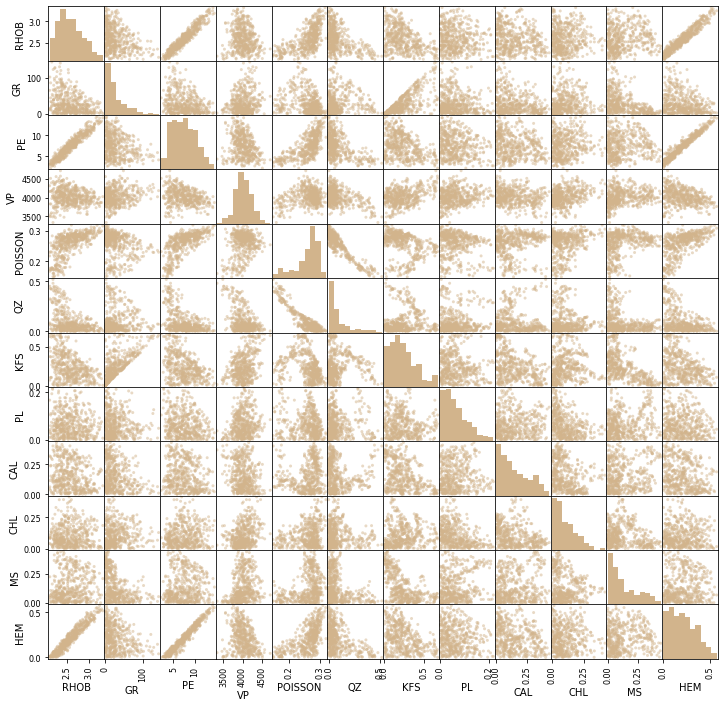

In [17]:
scatter_matrix(df_minerals[["RHOB", "GR", "PE", "VP", "POISSON", "QZ", "KFS", "PL", "CAL", "CHL", "MS", "HEM"]], color=color_sandstone, hist_kwds={'color':[color_sandstone]}, figsize=(12, 12), diagonal="hist");

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_05.png", bbox_inches="tight")
plt.show()

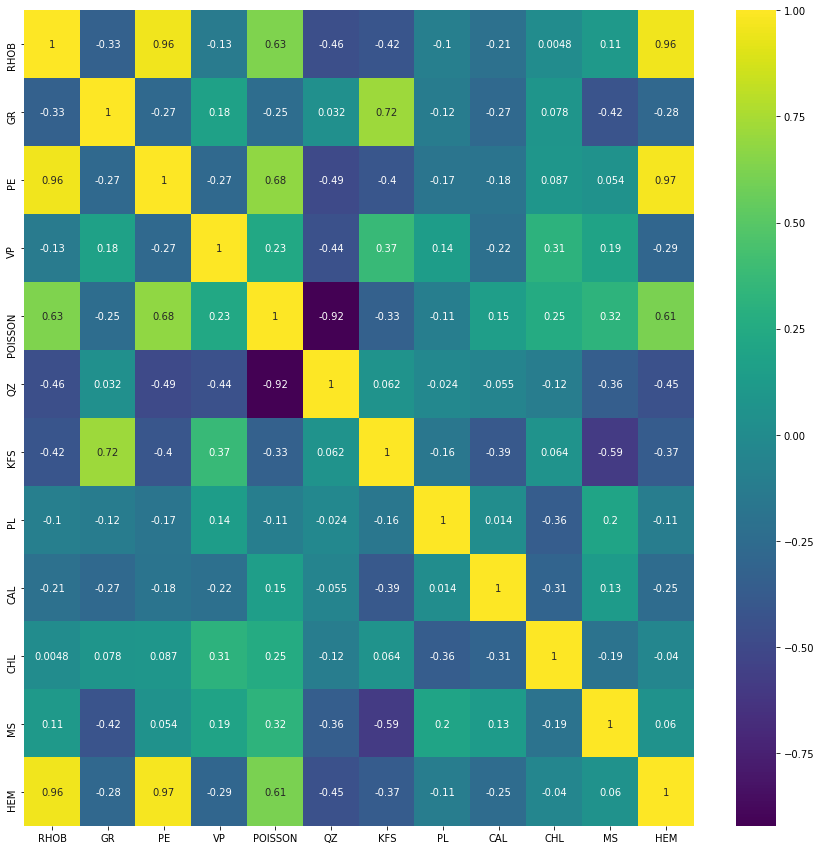

In [18]:
plt.figure(figsize=(15,15))
sn.heatmap(df_minerals.corr(), cmap="viridis", annot=True);

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_06.png", bbox_inches="tight")
plt.show()

In [19]:
df_elements = pd.DataFrame(list(zip(density_bulk, gr, pe, vP, elastic_mu, w_h, w_c, w_o, w_f, w_na, w_mg, w_al, w_si, w_k, w_ca, w_fe)), columns=["RHOB", "GR", "PE", "VP", "POISSON", "H", "C", "O", "F", "NA", "MG", "AL", "SI", "K", "CA", "FE"]) 

In [20]:
df_elements

,RHOB,GR,PE,VP,POISSON,H,C,O,F,NA,MG,AL,SI,K,CA,FE
0,2.188,1.538,3.322,3482.95,0.151,0.0004,0.0481,0.5064,0.0002,0.0018,0.0033,0.0096,0.2603,0.0027,0.1607,0.0065
1,2.189,2.127,4.312,3332.68,0.161,0.0002,0.0442,0.4947,0.0002,0.0033,0.0020,0.0115,0.2484,0.0029,0.1483,0.0443
2,2.262,4.535,3.871,3587.80,0.177,0.0005,0.0490,0.4997,0.0000,0.0009,0.0140,0.0118,0.2319,0.0032,0.1639,0.0251
3,2.213,5.297,4.359,3507.50,0.173,0.0009,0.0435,0.4941,0.0000,0.0032,0.0018,0.0160,0.2443,0.0038,0.1457,0.0467
4,2.303,8.933,3.962,3758.99,0.174,0.0015,0.0378,0.4959,0.0002,0.0044,0.0101,0.0246,0.2530,0.0080,0.1267,0.0378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.928,0.605,10.584,3829.93,0.272,0.0016,0.0147,0.4091,0.0032,0.0030,0.0008,0.0770,0.1222,0.0329,0.0531,0.2824
496,2.647,10.943,8.384,3814.29,0.263,0.0018,0.0187,0.4296,0.0035,0.0032,0.0020,0.0876,0.1454,0.0430,0.0649,0.2003
497,2.644,3.252,7.038,4042.25,0.253,0.0017,0.0203,0.4448,0.0031,0.0054,0.0072,0.0908,0.1628,0.0341,0.0776,0.1522
498,2.610,3.910,6.290,4183.14,0.249,0.0017,0.0176,0.4485,0.0036,0.0104,0.0000,0.1046,0.1776,0.0392,0.0697,0.1271


In [21]:
df_elements.describe()

,RHOB,GR,PE,VP,POISSON,H,C,O,F,NA,MG,AL,SI,K,CA,FE
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.590846,29.208956,7.493154,4021.836900,0.257844,0.001321,0.018079,0.441234,0.001277,0.011985,0.010349,0.069527,0.177265,0.031428,0.065196,0.172337
std,0.271988,27.932662,2.714804,208.067889,0.037246,0.000883,0.013545,0.027954,0.001105,0.009984,0.011973,0.020629,0.060175,0.016312,0.045434,0.098649
min,2.113000,0.000000,2.138000,3332.680000,0.150000,0.000000,0.000000,0.373500,0.000000,0.000300,0.000000,0.009600,0.058300,0.000200,0.001200,0.002700
25%,2.377500,8.712000,5.302250,3880.882500,0.243750,0.000600,0.006600,0.420200,0.000400,0.005000,0.002100,0.055375,0.130100,0.019575,0.026500,0.088300
50%,2.550500,20.575000,7.326500,4016.640000,0.270000,0.001200,0.014850,0.440950,0.000900,0.009250,0.006100,0.070100,0.159950,0.031350,0.056300,0.163350
75%,2.778750,41.404500,9.505750,4162.190000,0.284000,0.001800,0.028525,0.462800,0.002025,0.015525,0.014000,0.083725,0.230175,0.040325,0.098250,0.250075
max,3.316000,142.875000,14.602000,4724.350000,0.318000,0.005300,0.051500,0.506400,0.004200,0.054000,0.069000,0.117100,0.324800,0.094700,0.186400,0.439200


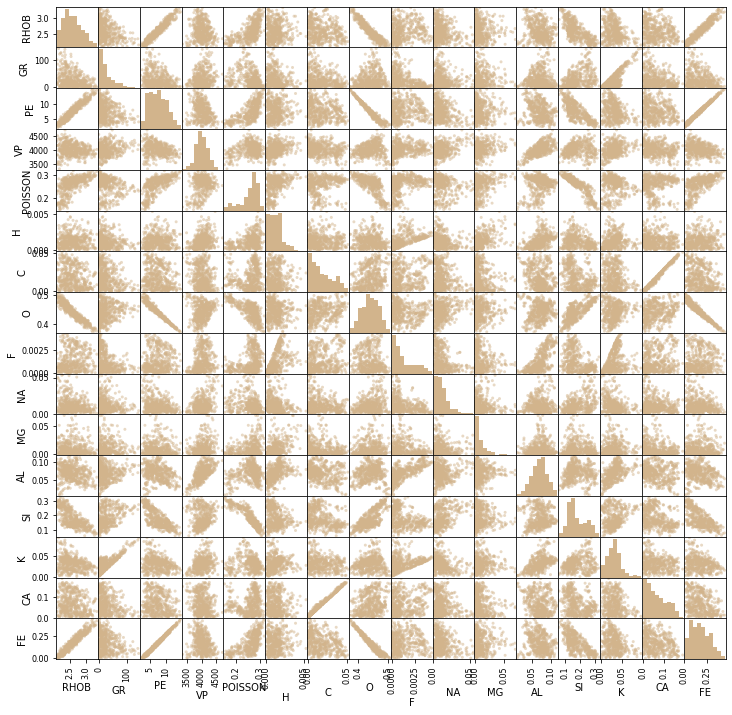

In [22]:
scatter_matrix(df_elements[["RHOB", "GR", "PE", "VP", "POISSON", "H", "C", "O", "F", "NA", "MG", "AL", "SI", "K", "CA", "FE"]], color=color_sandstone, hist_kwds={'color':[color_sandstone]}, figsize=(12, 12), diagonal="hist");

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_07.png", bbox_inches="tight")
plt.show()

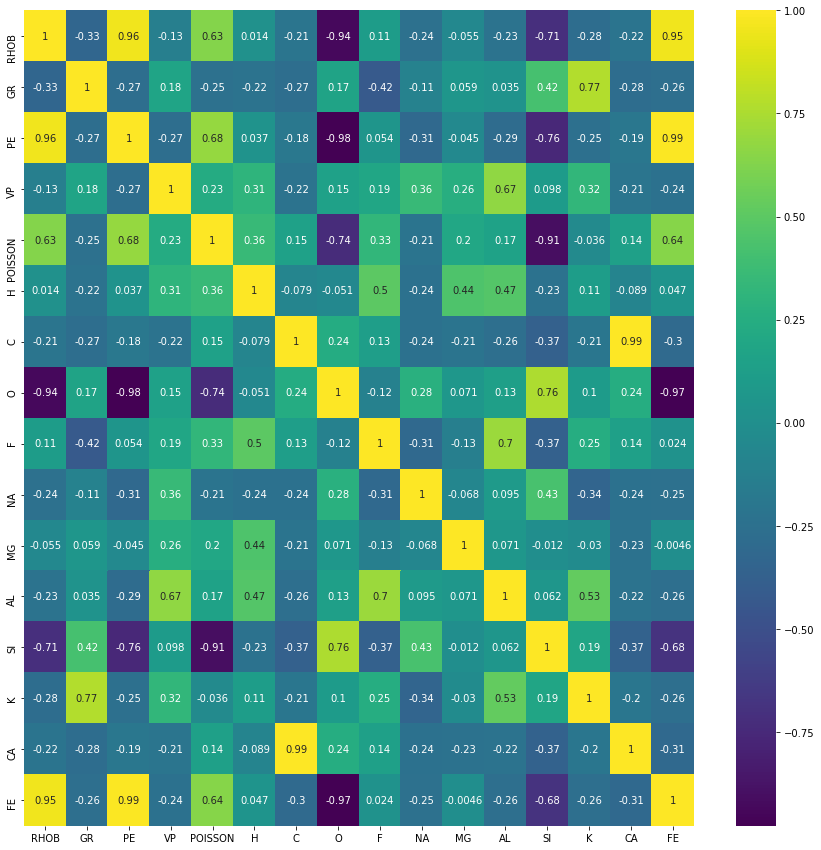

In [23]:
plt.figure(figsize=(15,15))
sn.heatmap(df_elements.corr(), cmap="viridis", annot=True);

#plt.tight_layout()
#plt.savefig("Tutorial_Sedimentary-Basin-Rock-Generation_08.png", bbox_inches="tight")
plt.show()